## Distribuição de carga em um anel quadrado com potencial fixo
Alunos: 
- Danilo Lima de Carvalho (dlc3)
- Luisa Fonseca Leiria de Andrade (lfla)

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros do problema
L = 0.4  # Lado do anel quadrado (40 cm)
V0 = 10  # Potencial fixo (10 V)
epsilon_0 = 8.854e-12  # Permissividade do vácuo (F/m)

# Valores de N para análise de convergência
N_values = [4,8,16,32,64]

Questão 1: Determine as expressões para os
elementos das matrizes de impedância e de tensão do método dos momentos.

In [72]:
# Criando uma uma função para deteminar as coordenadas dos centros dos quadrados que discretizam as placas
def setPontos(L, N, delta):
    lista = []
    # Calculo do centro dos quadrados discretizados e remoção da parte interna do anel
    for i in range(N):
        for j in range(N):
            x = (i + 0.5) * delta
            y = (j + 0.5) * delta
            if not ((x > L/4 and x < 3*L/4) and (y > L/4 and y < 3*L/4)):
                lista.append((x, y))  # Atribui o par de coordenadas (x, y)

    return lista

In [73]:
# Função para discretização do anel quadrado em N segmentos
def discretizacao(L, N):
    delta_s = L / N
    segmentos = setPontos(L, N, delta_s)
    num_segmentos = len(segmentos)
    return delta_s, segmentos, num_segmentos  # Retorna os pontos discretizados e o número de segmentos

In [74]:
# Função que calcula a matriz Z (matriz de Impedância)
def calcular_matriz_Z(N, segmentos, delta_s):
    Z = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                Z[i, j] = delta_s * np.log(1 + np.sqrt(2)) / (np.pi * epsilon_0)
            else:
                x1, y1 = segmentos[i]
                x2, y2 = segmentos[j] 
                d = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)  
                Z[i, j] = delta_s * delta_s / (4 * np.pi * epsilon_0 * d)
    return Z

Questão 2: Para o caso em que L = 40 cm, e V0 = 10 V, mostre as matrizes de impedância e tensão para um valor
de N (N=40 foi escolhido).

In [75]:
N = 40  # Escolhido para detalhar as matrizes
delta_s, segmentos, num_segmentos = discretizacao(L, N)
Z = calcular_matriz_Z(num_segmentos, segmentos, delta_s)
V = np.full(num_segmentos, V0)  # Vetor de tensões

In [76]:
# Exibir matrizes de impedância e tensão para N = 40
np.set_printoptions(precision=2, suppress=True)
print("Matriz de Impedância [Z]:")
print(Z)
print("\nVetor de Tensões [V]:")
print(V)

Matriz de Impedância [Z]:
[[3.17e+08 8.99e+07 4.49e+07 ... 1.67e+06 1.65e+06 1.63e+06]
 [8.99e+07 3.17e+08 8.99e+07 ... 1.69e+06 1.67e+06 1.65e+06]
 [4.49e+07 8.99e+07 3.17e+08 ... 1.72e+06 1.69e+06 1.67e+06]
 ...
 [1.67e+06 1.69e+06 1.72e+06 ... 3.17e+08 8.99e+07 4.49e+07]
 [1.65e+06 1.67e+06 1.69e+06 ... 8.99e+07 3.17e+08 8.99e+07]
 [1.63e+06 1.65e+06 1.67e+06 ... 4.49e+07 8.99e+07 3.17e+08]]

Vetor de Tensões [V]:
[10 10 10 ... 10 10 10]


Questão 3: Resolva o sistema linear para um valor de N específico que você escolheu acima (N=40). Determine as
amplitudes dos pulsos, e obtenha uma aproximação para a distribuição de carga superficial na placa.
Plote o resultado.

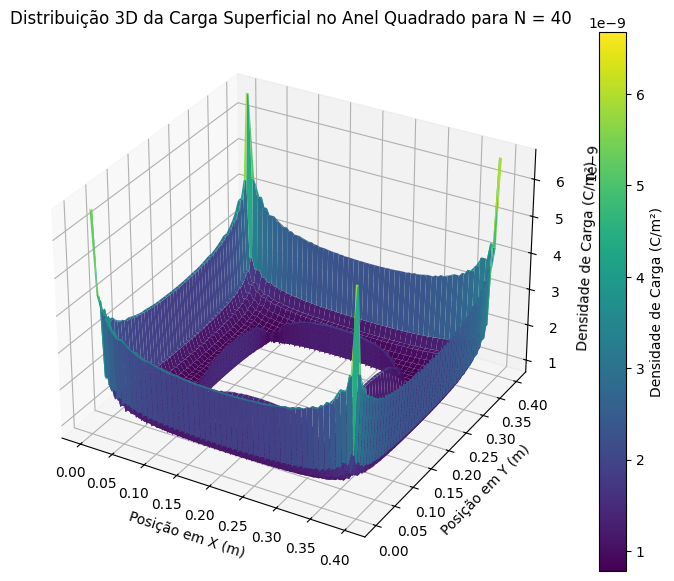

In [77]:
# Calculo da amplitude
def calcular_amplitude(Z, V):
    Q = np.linalg.solve(Z, V)
    return Q

# Função para mostrar o gráfico em 3D da distribuição de cargas
def mostrar_grafico3D(Q, num_segmentos, segmentos, N):

  delta_s = L / N

  # Criação da grade de valores para os eixos X e Y
  x_grid = np.linspace(0, L, 100)
  y_grid = np.linspace(0, L, 100)
  x_grid, y_grid = np.meshgrid(x_grid, y_grid)

  # Interpolando os valores de carga (Q) sobre a grade
  # Inicializando a grade com NaN para o quadrado central
  z_grid = np.full(x_grid.shape, np.nan)

  # Agora fazendo o preenchimento da superfície com os valores de carga, exceto no furo do centro
  for i in range(num_segmentos):
      x, y = segmentos[i]
      if not (L/4 < x < 3*L/4 and L/4 < y < 3*L/4): 
          z_grid = np.where((np.abs(x_grid - x) < delta_s/2) & (np.abs(y_grid - y) < delta_s/2), Q[i], z_grid)

  # Criando a figura para o gráfico
  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')

  # Plotando a superfície
  distribuicao_Q = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

  # Títulos e rótulos
  ax.set_title(f"Distribuição 3D da Carga Superficial no Anel Quadrado para N = {N}")
  ax.set_xlabel('Posição em X (m)')
  ax.set_ylabel('Posição em Y (m)')
  ax.set_zlabel('Densidade de Carga (C/m²)')

  # Barra de cor
  fig.colorbar(distribuicao_Q, ax=ax, label='Densidade de Carga (C/m²)')

  # Plotando o gráfico
  plt.show()

# Chamando a função que resolve o sistema linear
Q = calcular_amplitude(Z, V)

# Chamando metodo para mostrar o gráfico
mostrar_grafico3D(Q, num_segmentos, segmentos, N)

Questão 4: Resolva o problema e plote a distribuição superficial de carga para diferentes valores de N. Comente
os resultados.


Carga total para N = 4: 1.49e-09 C


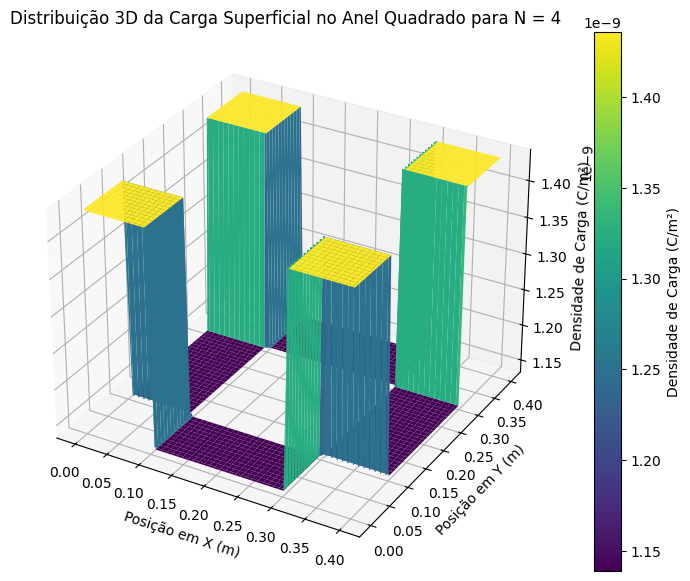


Carga total para N = 8: 3.09e-09 C


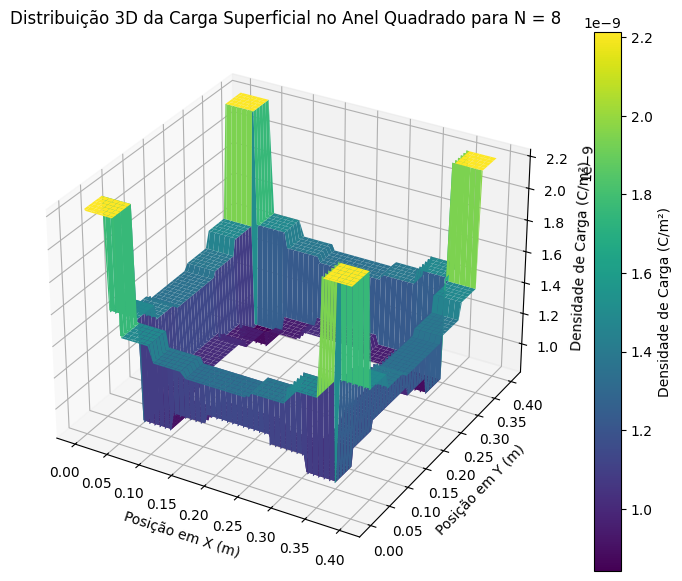


Carga total para N = 16: 6.30e-09 C


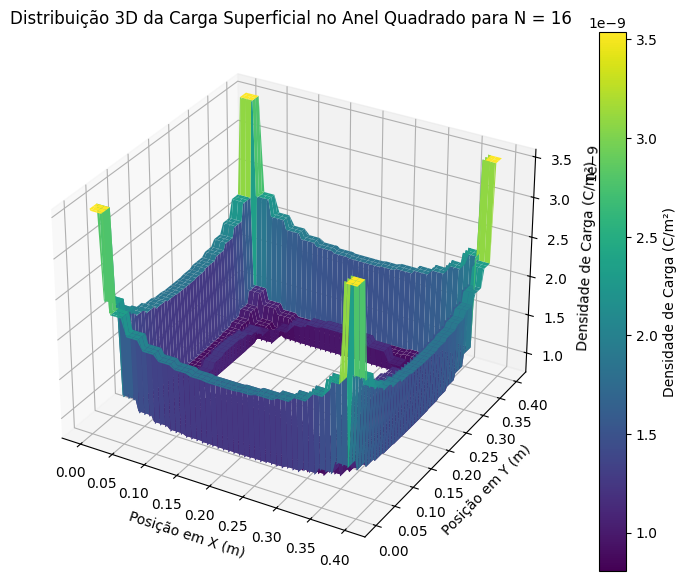


Carga total para N = 32: 1.27e-08 C


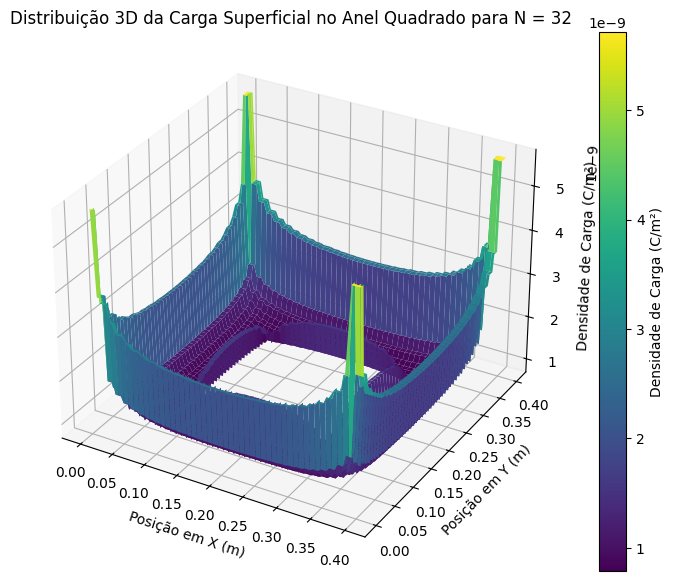


Carga total para N = 64: 2.56e-08 C


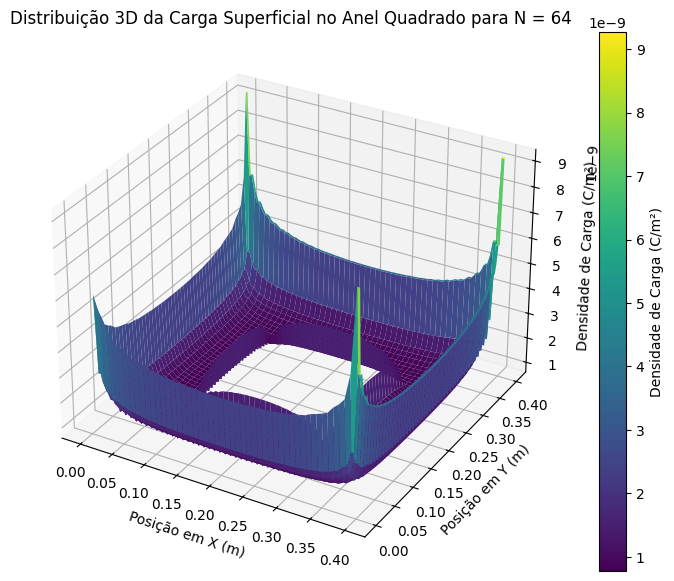

In [78]:
# 4ª Questão: Resolver e plotar para diferentes valores de N
distribuicoes = []
for N in N_values:
    delta_s, segmentos, num_segmentos = discretizacao(L, N)
    Z = calcular_matriz_Z(num_segmentos, segmentos, delta_s)
    V = np.full(num_segmentos, V0)
    Q = np.linalg.solve(Z, V)
    distribuicoes.append(Q)
    print(f"\nCarga total para N = {N}: {np.sum(Q) * delta_s:.2e} C")
    mostrar_grafico3D(Q, num_segmentos, segmentos, N)


À medida que o valor de N aumenta, a discretização se torna mais detalhada, pois a quantidade de quadrados cresce. Isso permite uma representação mais precisa da distribuição de cargas sobre a superfície da placa.

Questão 5: Determine a carga total na placa para os diferentes valores de N acima e observe a sua convergência.

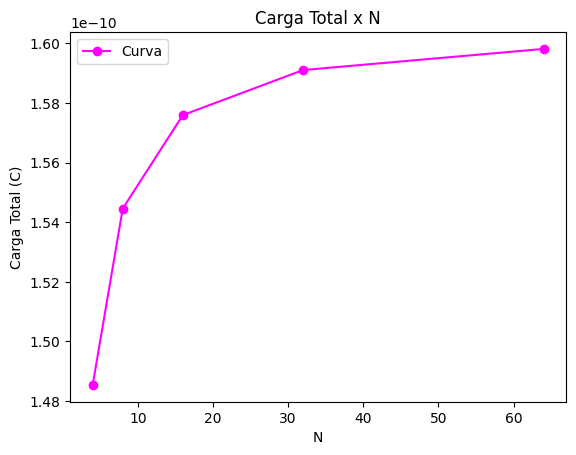

In [79]:
# 5ª Questão: Analisar convergência da carga total com N

# Função que aramzena em um array o resultado da carga para diferentes valores de N
def calcular_Q_total(N_values, L, V0):
    Q_total = []
    for N in N_values:
        delta_s, segmentos, num_segmentos = discretizacao(L, N)
        V = np.full(num_segmentos, V0)
        Z = calcular_matriz_Z(num_segmentos, segmentos, delta_s)
        Q = calcular_amplitude(Z, V)
        soma_Q = np.sum(Q)*(delta_s**2)
        Q_total.append(soma_Q)

    return Q_total

# Calculo de Q para diferentes valores de N
Q_total = calcular_Q_total(N_values, L, V0)

# Plotando grafico que converge de Q
plt.plot(N_values, Q_total, marker='o', color='magenta', label='Curva')

# Título e rótulos aos eixos e legenda
plt.title("Carga Total x N")
plt.xlabel("N")
plt.ylabel("Carga Total (C)")
plt.legend()

# Exibindo o gráfico
plt.show()